In [21]:
# Import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

## Titanic
Keywords: multivariate, classification.

## Description
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this skill drill, you are being asked to build a predictive model that answers the question: “who is more likely to survive?” using passenger data (ie age, gender, socio-economic class, etc). The variables included in the dataset are the following:

- PassengerID: Passenger identifier
- Pclass: Ticket class - 1 = 1st; 2 = 2nd; 3 = 3rd;
- Sex: 0 = Female & 1 = Male
- Age: age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Fare: Passenger fare cost
- Embarked: Port of Embarkation - 0 = Cherbourg; 1 = Queenstown; 2 = Southampton;
- Survived: whether during the shipwreck the individual survived - 0 = did not survive; 1 = survived; (the predicted attribute)

## Source
https://www.kaggle.com/c/titanic/data

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('../Resources/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


### Logistic Regression

In [3]:
# Select our independent X variables, and our dependent y variable. 
X = df.drop(columns='Survived')
y = df['Survived']

In [5]:
# Confirm independent variable data types are numeric
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Pclass       714 non-null    int64  
 2   Sex          714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
 7   Embarked     714 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.8 KB


In [8]:
# Create our Validation training and testing datasets.
X_new, X_test,y_new,y_test = train_test_split(X,y,test_size=0.2, random_state = 20)
X_train, X_val,y_train,y_val = train_test_split(X_new,y_new,test_size=0.2, random_state = 20)

In [13]:
# Create the Linear Regression model object
log_model = LogisticRegression(solver='liblinear')

In [14]:
# Train the model using the training sets
log_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [16]:
# Make predictions using the testing dataset
y_pred = log_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
# Score the model with the testing dataset
log_model.score(X_test,y_test)

0.7832167832167832

In [19]:
# Create DataFrame of results
Results = pd.DataFrame({'Predicted': y_pred})
Results.head()

,Predicted
0,1
1,1
2,1
3,1
4,0


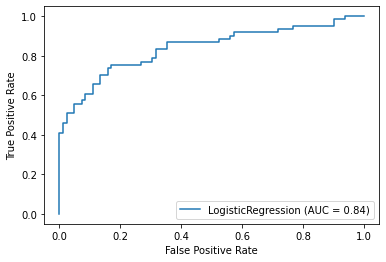

In [22]:
# Plot the ROC (Receiver Operating Characteristic) curve visualize our models accuracy rate
plot_roc_curve(log_model,X_test,y_test)